In [2]:
from numpy import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Fake data

In [36]:
n_examples = 1000

citationIds = ['citation%s'%id for id in range(n_examples)]
latitudes =  [39.299236 + random.rand() - 0.5 for _ in range(n_examples)]
longitudes = [-76.609383 + random.rand() -0.5 for _ in range(n_examples)]
political_neigh = random.choice(['North', 'Northeast', 'East', 'Southeast', 
                                 'South', 'Southwest', 'West', 'Northwest', 'Central'],n_examples)

bmoreZips = [21201, 21202, 21203, 21205, 21206, 
             21209, 21210, 21211, 21212, 21213, 
             21214, 21215, 21216, 21217, 21218, 
             21223, 21224, 21229, 21230, 21231, 
             21233, 21235, 21239, 21241, 21251, 
             21263, 21264, 21270, 21273, 21275, 
             21278, 21279, 21280, 21281, 21287, 
             21288, 21289, 21290, 21297, 21298]
zipcodes = [str(random.choice(bmoreZips)) for _ in range(n_examples)]

current_balance = random.randint(75,150,n_examples)

In [11]:
df = pd.DataFrame({'citationId':citationIds,
                   'latitude':latitudes,
                   'longitude':longitudes,
                  'political_neighborhood':political_neigh,
                  'zipcode':zipcodes,
                  'balance':current_balance})
df.head()

,balance,citationId,latitude,longitude,political_neighborhood,zipcode
0,100,citation0,39.296687,-76.376014,Northwest,21264
1,98,citation1,39.258185,-76.794852,South,21230
2,76,citation2,39.360320,-76.264458,Central,21275
3,120,citation3,38.821104,-76.367387,Central,21233
4,131,citation4,39.343000,-76.381391,North,21263


### Real data

In [52]:
names=['citationId','latitude','longitude','hood','number','street','zipcode','zip_suffix','landmark']
df = pd.read_csv('geocode-1508.txt',sep='\t',names=names)

In [53]:
df.head()

,citationId,latitude,longitude,hood,number,street,zipcode,zip_suffix,landmark
0,62756409,null,null,Downtown,419,West Redwood Street,21201,7003,null
1,62756417,null,null,Downtown,1420,North Charles Street,21201,null,null
2,62756433,null,null,Downtown,null,East Mount Vernon Place,21202,null,null
3,62756441,39.287318,-76.626216,Downtown,700,West Lombard Street,21201,null,Penn Street
4,62756458,39.297446,-76.617617,Downtown,105,West Monument Street,21201,4701,null


### Some fake balance data for now

In [54]:
num_rows = df.shape[0]
df['balance'] = random.randint(75,500,num_rows)
df.head()

,citationId,latitude,longitude,hood,number,street,zipcode,zip_suffix,landmark,balance
0,62756409,null,null,Downtown,419,West Redwood Street,21201,7003,null,317
1,62756417,null,null,Downtown,1420,North Charles Street,21201,null,null,216
2,62756433,null,null,Downtown,null,East Mount Vernon Place,21202,null,null,393
3,62756441,39.287318,-76.626216,Downtown,700,West Lombard Street,21201,null,Penn Street,151
4,62756458,39.297446,-76.617617,Downtown,105,West Monument Street,21201,4701,null,464


### Processing

In [55]:
pn_df = df.groupby('hood',as_index=False).agg({'balance':['mean','sum'],'citationId':'count'})
pn_df.columns = ["_".join(x) for x in pn_df.columns.ravel()]
pn_df.head()

,hood_,balance_mean,balance_sum,citationId_count
0,Abell,269.823529,4587,17
1,Allendale,264.800000,2648,10
2,Arlington,364.000000,2184,6
3,Armistead Gardens,206.400000,1032,5
4,Ashburton,255.500000,1533,6


### Citation count analysis

In [56]:
pn_df = pn_df.sort_values('citationId_count',ascending=False)
pn_df.head()

,hood_,balance_mean,balance_sum,citationId_count
52,Downtown,281.318514,461925,1642
41,Claremont - Freedom,284.635940,305699,1074
63,Edmondson Village,287.817697,269973,938
153,Morrell Park,287.182013,268228,934
172,Panway - Braddish,288.427623,217186,753


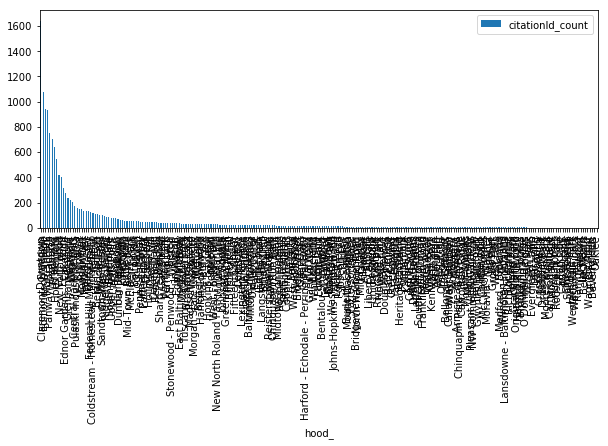

In [57]:
pn_df.plot(x='hood_', y='citationId_count', kind='bar',figsize=(10,4))

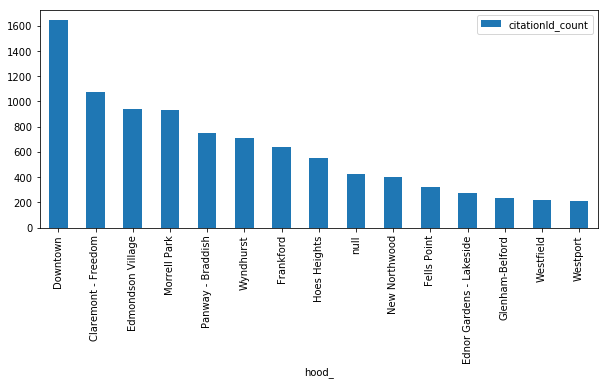

In [58]:
pn_df.head(15).plot(x='hood_', y='citationId_count', kind='bar',figsize=(10,4))

### Balance analysis

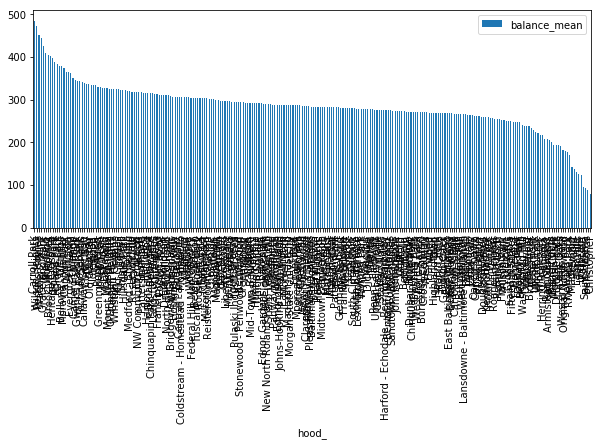

In [59]:
pn_df = pn_df.sort_values('balance_mean',ascending=False)
pn_df.plot(x='hood_', y='balance_mean', kind='bar',figsize=(10,4))

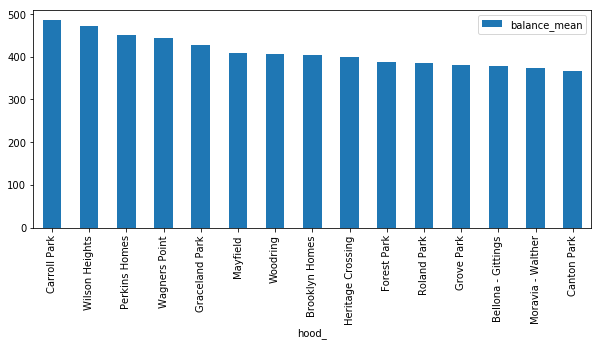

In [60]:
pn_df.head(15).plot(x='hood_', y='balance_mean', kind='bar',figsize=(10,4))

### Analysis by zip code

In [61]:
zip_df = df.groupby('zipcode',as_index=False).agg({'balance':['mean','sum'],'citationId':'count'})
zip_df.columns = ["_".join(x) for x in zip_df.columns.ravel()]
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
0,21201,281.412259,335162,1191
1,21202,284.914384,332780,1168
2,21204,268.562500,4297,16
3,21205,291.226158,106880,367
4,21206,284.943694,253030,888


In [62]:
zip_df = zip_df.sort_values('citationId_count',ascending=False)
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
11,21213,285.829027,376151,1316
0,21201,281.412259,335162,1191
1,21202,284.914384,332780,1168
21,21223,286.652586,332517,1160
27,21229,285.673267,317383,1111


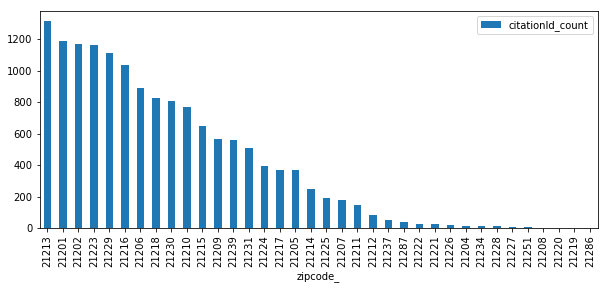

In [63]:
zip_df.plot(x='zipcode_', y='citationId_count', kind='bar',figsize=(10,4))

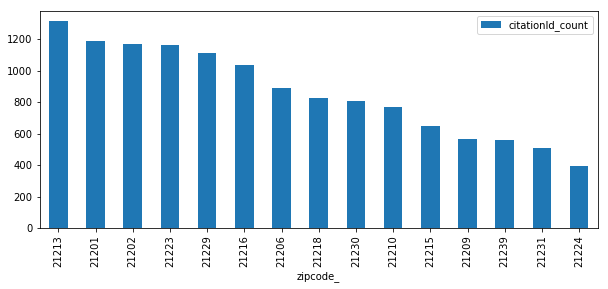

In [64]:
zip_df.head(15).plot(x='zipcode_', y='citationId_count', kind='bar',figsize=(10,4))

In [65]:

zip_df = zip_df.sort_values('balance_mean',ascending=False)
zip_df.head()

,zipcode_,balance_mean,balance_sum,citationId_count
34,21286,426.000000,426,1
24,21226,342.523810,7193,21
26,21228,342.153846,4448,13
17,21219,334.000000,334,1
19,21221,329.913043,7588,23


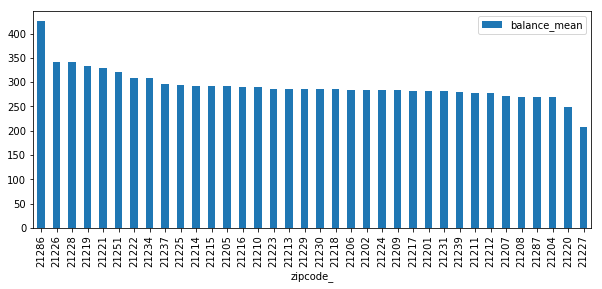

In [66]:
zip_df.plot(x='zipcode_', y='balance_mean', kind='bar',figsize=(10,4))

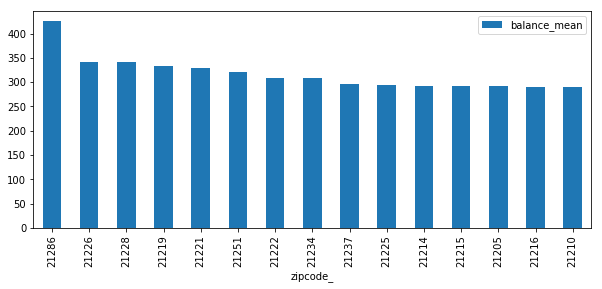

In [67]:
zip_df.head(15).plot(x='zipcode_', y='balance_mean', kind='bar',figsize=(10,4))

In [68]:
badzips = df[~df['zipcode'].isin(bmoreZips)]['zipcode'].unique()
badzips.sort()
print(badzips)

[21204 21207 21208 21219 21220 21221 21222 21225 21226 21227 21228 21234
 21237 21286]
